# Topics covered in this part of the course

DATA ANALYSIS WITH PYTHON III - Data Visualization & Descriptive Statistics
EDA with Python - Data Visualization

* Matplotlib vs Seaborn
* Foundational Charts: bar chat, scatter plot, line graph
* Plot Multiple Elements
* Data Visualization Customization

EDA with Python - Descriptive Statistics

* Descriptive Statistics using Pandas and NumPy
* Statistical Charts - Histogram and Boxplot
* Pairplots
* Correlations



# Part 2

Student will...

A) Join the cleaned demographics/services DF to a new Churn DF<br>
B) Examine the relationship between each column and churn<br>
C) Select four colunms of interest to explore in more depth<br>
D) Run statistical tests on these four columns to determine whether they have a significant relationship to churn



**Student output** : Well-documented code presented in a Jupyter notebookshowing results of EDA, including multiple well-labeled visualizations. Should include a brief writeup (in a notebook text cell) of their findings. 


In [43]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
print('packages imported successfully')


packages imported successfully


In [44]:
# import csvs
# this should be the cleaned, joined version of the data they worked with in Part 1
customers_df = pd.read_csv("tco-customers.csv")
# this is the churn data
churn_df = pd.read_csv("tco-churn-only.csv")
print("csvs imported successfully")

csvs imported successfully


### Task: Perform standard preliminary EDA on the churn DataFrame

In [45]:
churn_df.shape

(7043, 2)

In [46]:
churn_df.head()

,Customer ID,Churn Label
0,8779-QRDMV,Yes
1,7495-OOKFY,Yes
2,1658-BYGOY,Yes
3,4598-XLKNJ,Yes
4,4846-WHAFZ,Yes


In [47]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
Customer ID    7043 non-null object
Churn Label    7043 non-null object
dtypes: object(2)
memory usage: 110.2+ KB


Observation: This is a very small table. It only contains customer ID and churn label. We can skip .describe() because there are no numerical columns.

In [48]:
# remove spaces in column names & lowercase everything
churn_df.columns = churn_df.columns.str.replace(" ", "_")
churn_df.columns = churn_df.columns.str.lower()
churn_df.columns

Index(['customer_id', 'churn_label'], dtype='object')

In [49]:
# look at churn value counts
churn_df["churn_label"].value_counts()

No     5174
Yes    1869
Name: churn_label, dtype: int64

### Task: Join the churn_df to the demog_serv_df

In [50]:
# join the churn df with the demographics and services df
# first, make sure the Customer_ID column is compatible
churn_df.customer_id.head()

0    8779-QRDMV
1    7495-OOKFY
2    1658-BYGOY
3    4598-XLKNJ
4    4846-WHAFZ
Name: customer_id, dtype: object

In [51]:
customers_df.customer_id.head()

0    8779QRDMV
1    7495OOKFY
2    1658BYGOY
3    4598XLKNJ
4    4846WHAFZ
Name: customer_id, dtype: object

In [52]:
# remove the hyphen from the churn columns Customer ID
churn_df["customer_id"] = churn_df.customer_id.str.replace("-", "")
churn_df.customer_id.head()

0    8779QRDMV
1    7495OOKFY
2    1658BYGOY
3    4598XLKNJ
4    4846WHAFZ
Name: customer_id, dtype: object

In [53]:
joined_df = pd.merge(customers_df, churn_df, on="customer_id")
joined_df.head()

,customer_id,count_x,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,count_y,...,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,churn_label
0,8779QRDMV,1,Male,78,No,Yes,No,No,0,1,...,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,Yes
1,7495OOKFY,1,Female,74,No,Yes,Yes,Yes,1,1,...,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,Yes
2,1658BYGOY,1,Male,71,No,Yes,No,Yes,3,1,...,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,Yes
3,4598XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,1,...,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,Yes
4,4846WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,1,...,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,Yes


**At this point, we could have them propose some hypotheses regarding why people churn. Are older people more likely to churn? People with dependents? People who have been with the company a shorter amount of time?**

In [121]:
# do a .info() just to get a feel for what we're working with again
info_df = joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 29 columns):
Customer_ID                          7043 non-null object
Gender                               7043 non-null object
Age                                  7043 non-null int64
Under_30                             7043 non-null object
Senior_Citizen                       7043 non-null object
Married                              7043 non-null object
Dependents                           7043 non-null object
Number_of_Dependents                 7043 non-null int64
Referred_a_Friend                    7043 non-null object
Number_of_Referrals                  7043 non-null int64
Tenure_in_Months                     7043 non-null int64
Offer                                7043 non-null object
Phone_Service                        7043 non-null object
Avg_Monthly_Long_Distance_Charges    7043 non-null float64
Multiple_Lines                       7043 non-null object
Internet_Service          

All missing values should have been dealt with in Project 2 Part 1.

### Task: create boxplots to show each numerical column vs. churn

In [39]:
# make a list of numerical columns. Here's a way to do it with code but you can also do it by hand
numerical_cols = joined_df.columns[joined_df.dtypes == "int64"].union(joined_df.columns[joined_df.dtypes == "float64"])
numerical_cols


Index(['Age', 'Avg_Monthly_GB_Download', 'Avg_Monthly_Long_Distance_Charges',
       'Monthly_Charge', 'Number_of_Dependents', 'Number_of_Referrals',
       'Tenure_in_Months', 'Total_Charges', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Refunds', 'Total_Revenue'],
      dtype='object')

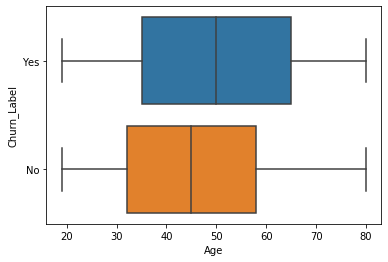

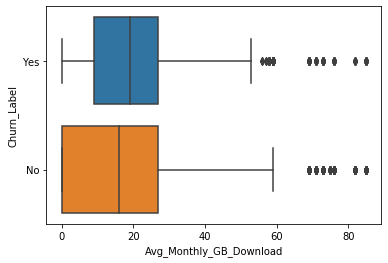

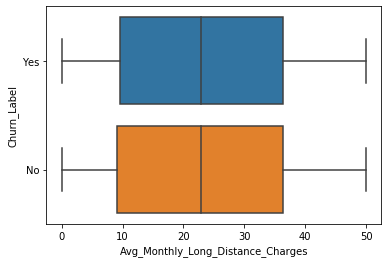

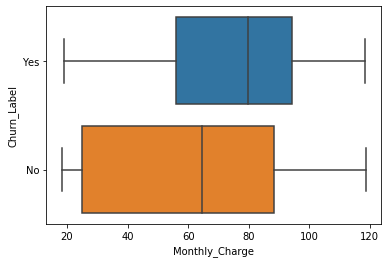

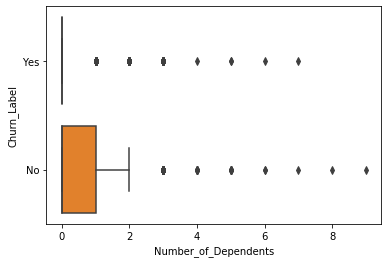

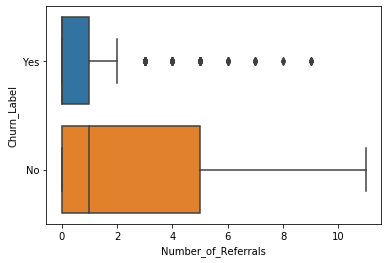

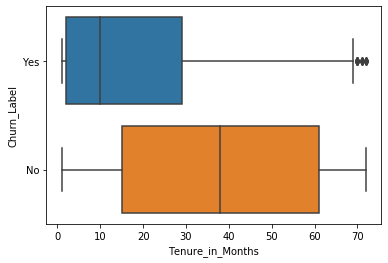

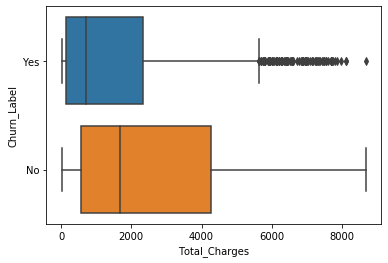

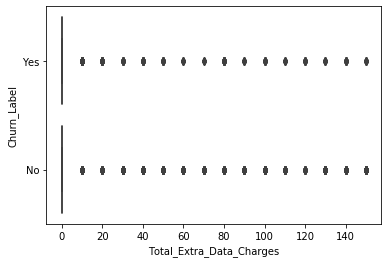

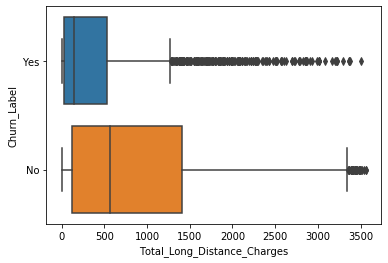

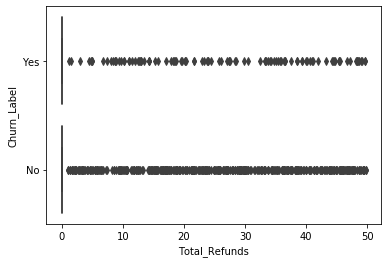

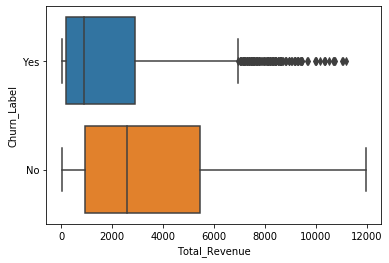

In [40]:
for col in numerical_cols:
    sns.boxplot(joined_df[col], joined_df.Churn_Label)
    plt.show()

**This is a good place to pause and make some observations about these plots.**

### Task: plot all the categorical columns vs. churn using bar charts

In [44]:
# make a list of all the categorical columns
categorical_cols = joined_df.columns[joined_df.dtypes == "object"]
categorical_cols

Index(['Customer_ID', 'Gender', 'Under_30', 'Senior_Citizen', 'Married',
       'Dependents', 'Referred_a_Friend', 'Offer', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Internet_Type', 'Unlimited_Data',
       'Contract', 'Paperless_Billing', 'Payment_Method', 'Churn_Label'],
      dtype='object')

We obviously don't want to plot by Customer_ID, and Churn_Label is our target, so let's drop those two column names.

In [45]:
categorical_cols = categorical_cols.drop(["Customer_ID", "Churn_Label"])
categorical_cols

Index(['Gender', 'Under_30', 'Senior_Citizen', 'Married', 'Dependents',
       'Referred_a_Friend', 'Offer', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method'],
      dtype='object')

In [47]:
# write a function to create a bar chart showing Churned vs. Not Churned for 
# each value in each categorical column
def churn_bar_chart(df, feature_col, target_col):
    df.groupby(feature_col)[target_col].value_counts().unstack().plot.bar()
    plt.title(target_col + ' vs. ' + feature_col)
    plt.show()

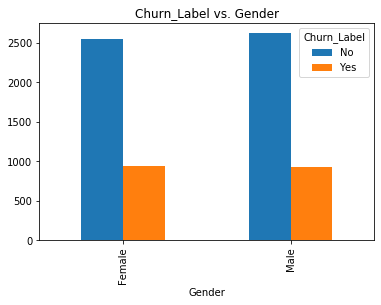

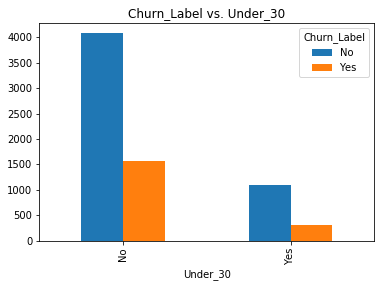

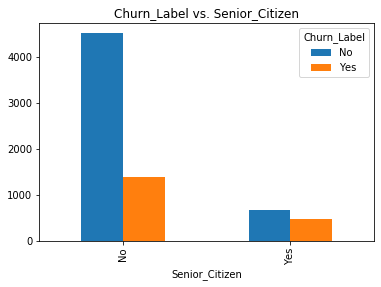

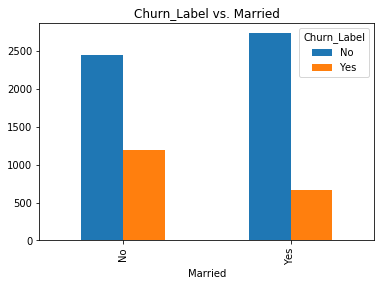

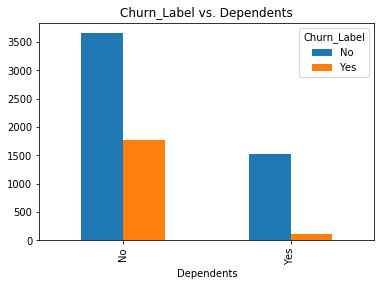

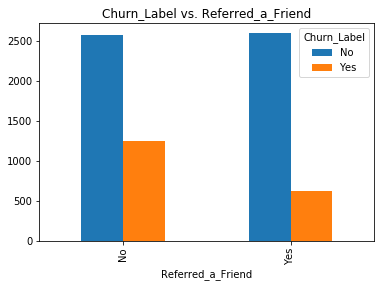

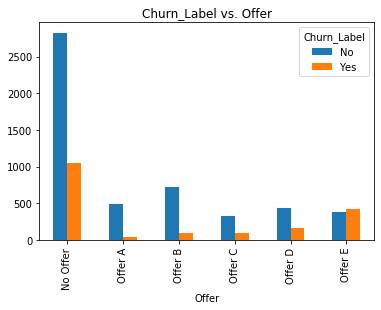

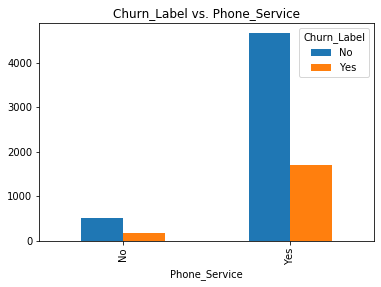

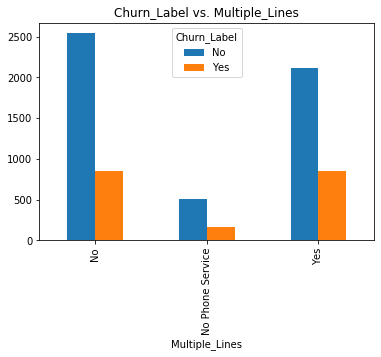

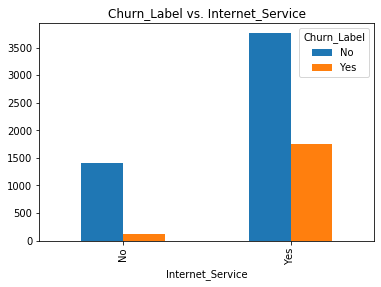

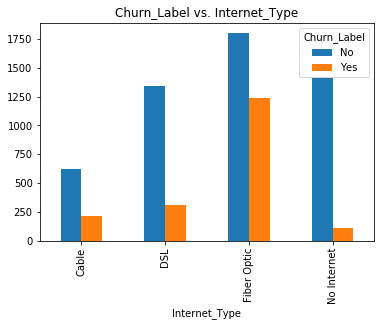

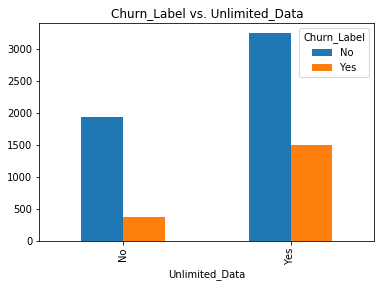

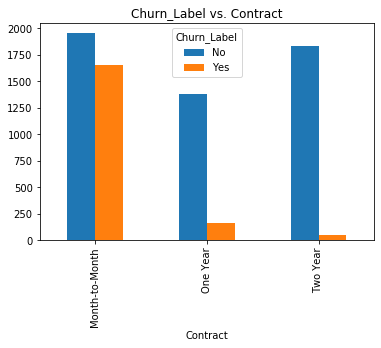

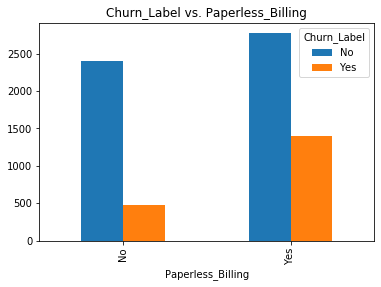

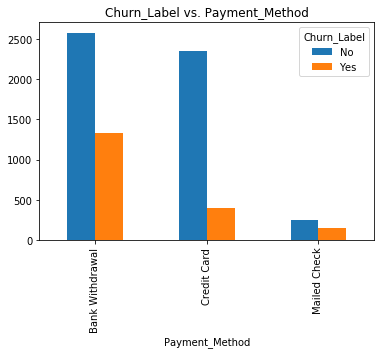

In [70]:
for col in categorical_cols:
    churn_bar_chart(joined_df, col, "Churn_Label")

NOTE: We need to address the fact that blue maps to Yes for the first two plot types but orange maps to yes in the last one. Colors are notoriously hard to deal with but I expect that when I write the "Customizing your plots" lesson a lot of the confusion will clear up for me and I can then apply it here. 

At this point, I would like to ask students to select 2 numerical columns, one two-value categorical column, and one more-than-two-value categorical column to learn more about. 
They should be columns where it seems clear that there is a difference between customers who churn and those who do not. If it were me, I might select

1) Tenure in Months

2) Monthly Charge

3) Internet Type

4) Senior Citizen

### Further exploration of Tenure in Months column

Let's look at summary statistics for Tenure in Months on its own and filtered by churned/not churned

In [123]:
joined_df.Tenure_in_Months.describe()

count    7043.000000
mean       32.386767
std        24.542061
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure_in_Months, dtype: float64

In [124]:
joined_df.loc[joined_df.Churn_Label=="Yes"].Tenure_in_Months.describe()

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: Tenure_in_Months, dtype: float64

In [125]:
joined_df.loc[joined_df.Churn_Label=="No"].Tenure_in_Months.describe()

count    5174.000000
mean       37.591225
std        24.085029
min         1.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: Tenure_in_Months, dtype: float64

Observations: Non-churning customers have been with the company on average about 3 years. Median for churning customers is only 10 months, and the bottom quartile 25% have been with the company less than 3 months.  

Is there a relationship between tenure in months and monthly charges?

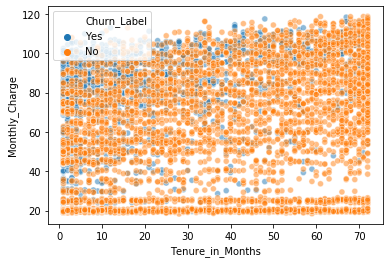

In [126]:
sns.scatterplot(joined_df.Tenure_in_Months, joined_df.Monthly_Charge, hue=joined_df.Churn_Label, alpha=0.5)

Too much data! hard to say. We could look at a scatterplot for Churned and a Separate one for not Churned. In fact, let's just go ahead and create two new DFs.

In [127]:
yes_churn_df = joined_df.loc[joined_df.Churn_Label == "Yes"]
no_churn_df = joined_df.loc[joined_df.Churn_Label == "No"]

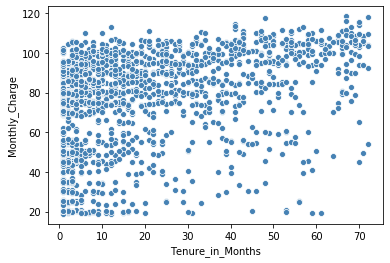

In [128]:
sns.scatterplot(yes_churn_df.Tenure_in_Months, yes_churn_df.Monthly_Charge, color='steelblue')

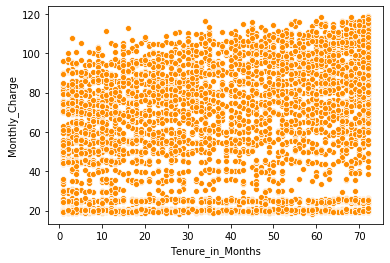

In [129]:
sns.scatterplot(no_churn_df.Tenure_in_Months, no_churn_df.Monthly_Charge, color = 'darkorange')

It's still hard to tell exactly what's going on, but it does look like, among churners with a long tenure, the monthly charge tends to be on the higher end. This could be an indication that they found a better deal elsewhere. 

### Further exploration of Monthly Charge column

In [130]:
joined_df.Monthly_Charge.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: Monthly_Charge, dtype: float64

In [131]:
yes_churn_df.Monthly_Charge.describe()

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: Monthly_Charge, dtype: float64

In [132]:
no_churn_df.Monthly_Charge.describe()

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: Monthly_Charge, dtype: float64

Monthly chargers among non-churners average about \$60. For churners, it's ~\$75-80. Monthly charge does appear to be a factor in churn. 

### Further Exploration of Internet Type column

In [133]:
internet_type_gb = joined_df.groupby("Internet_Type")    

In [134]:
internet_type_gb.count()["Customer_ID"]

Internet_Type
Cable           830
DSL            1652
Fiber Optic    3035
No Internet    1526
Name: Customer_ID, dtype: int64

In [135]:
internet_type_and_churned_gb = joined_df.groupby(["Internet_Type","Churn_Label"])

In [136]:
internet_type_and_churned_counts = internet_type_and_churned_gb.count()[["Customer_ID"]]
internet_type_and_churned_counts


Customer_ID
Internet_Type Churn_Label             
Cable         No                   617
              Yes                  213
DSL           No                  1345
              Yes                  307
Fiber Optic   No                  1799
              Yes                 1236
No Internet   No                  1413
              Yes                  113

In [181]:
internet_type_counts = internet_type_gb.count()[["Customer_ID"]]
internet_type_counts.rename(columns={"Customer_ID": "Total_Counts"}, inplace=True)
internet_type_counts

,Total_Counts
Internet_Type,
Cable,830
DSL,1652
Fiber Optic,3035
No Internet,1526


In [182]:
pd.merge(internet_type_and_churned_counts, internet_type_counts, on="Internet_Type")

,Customer_ID,Total_Counts
Internet_Type,,
Cable,617,830
Cable,213,830
DSL,1345,1652
DSL,307,1652
Fiber Optic,1799,3035
Fiber Optic,1236,3035
No Internet,1413,1526
No Internet,113,1526


In [138]:
# not sure I could quite verbalize why this words but I'm excited it does! 
percentages_df = pd.DataFrame(internet_type_and_churned_counts["Customer_ID"]*100/internet_type_gb.count()["Customer_ID"])
percentages_df

Customer_ID
Internet_Type Churn_Label             
Cable         No             74.337349
              Yes            25.662651
DSL           No             81.416465
              Yes            18.583535
Fiber Optic   No             59.275124
              Yes            40.724876
No Internet   No             92.595020
              Yes             7.404980

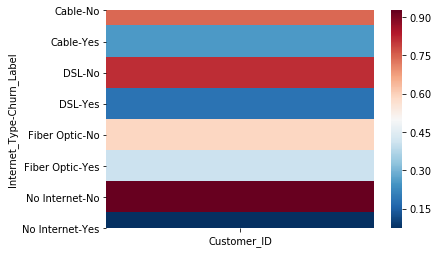

In [99]:
sns.heatmap(percentages_df, cmap="RdBu_r")

^ Not quite what I was going for, but still interesting and could be finagled.
Was trying to visualize the percentages seen above. Basically, the lighter the blue, the greater the percentage of people who churned. <br>
We can note here that almost 41% of people with Fiber Optic end up churning, followed by 26% for Cable and 19% for DSL. People without Internet service are way less likely to churn than any of these. We should alert someone immediately to look into the Fiber Optic issue. 

### Further Exploration of Senior Citizen column

In [102]:
senior_citizen_gb = joined_df.groupby("Senior_Citizen")

In [104]:
senior_citizen_churn_gb = joined_df.groupby(["Senior_Citizen", "Churn_Label"])
senior_citizen_churn_gb.count()["Customer_ID"]

Senior_Citizen  Churn_Label
No              No             4508
                Yes            1393
Yes             No              666
                Yes             476
Name: Customer_ID, dtype: int64

In [139]:
percentages_df2 = pd.DataFrame(senior_citizen_churn_gb.count()["Customer_ID"]*100/senior_citizen_gb.count()["Customer_ID"])
percentages_df2

Customer_ID
Senior_Citizen Churn_Label             
No             No             76.393832
               Yes            23.606168
Yes            No             58.318739
               Yes            41.681261

About 42% of Seniors churned, compared to about 24% of non-Seniors. <br>
Question: Are Seniors using different services than non-seniors? 

In [111]:
seniors_phone = joined_df.groupby(["Senior_Citizen", "Phone_Service"]).count()[["Customer_ID"]]
seniors_phone

Customer_ID
Senior_Citizen Phone_Service             
No             No                     578
               Yes                   5323
Yes            No                     104
               Yes                   1038

These look like they're about the same proportions

In [112]:
seniors_internet = joined_df.groupby(["Senior_Citizen", "Internet_Service"]).count()[["Customer_ID"]]
seniors_internet

Customer_ID
Senior_Citizen Internet_Service             
No             No                       1474
               Yes                      4427
Yes            No                         52
               Yes                      1090

But it looks like Seniors are a lot more likely to have internet service than non-Seniors are. 

In [113]:
seniors_internet_and_phone = joined_df.groupby(["Senior_Citizen", 
                                                "Internet_Service", 
                                                "Phone_Service"]).count()[["Customer_ID"]]
seniors_internet_and_phone

Customer_ID
Senior_Citizen Internet_Service Phone_Service             
No             No               Yes                   1474
               Yes              No                     578
                                Yes                   3849
Yes            No               Yes                     52
               Yes              No                     104
                                Yes                    986

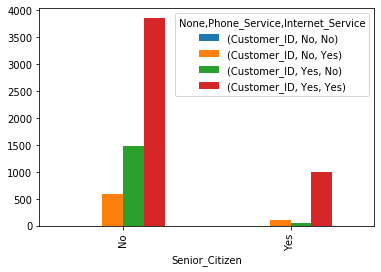

In [115]:
seniors_internet_and_phone.unstack().unstack().plot.bar()

Orange is internet service only, green is phone service only, red is both.

### Then let's have them do two hypothesis tests, one a test of proportions (categorical variable) and the other a test of means (numerical variable). 
let's just require the proportions test to be with a 2-value variable. I don't want to get into ANOVA. 

### Task: With your dichotomous (2-value) categorical variable, conduct a hypothesis test of proportions to determine whether there is a statistically significant difference in the churn rates for Group A and Group B (e.g. seniors and non-seniors)

This isn't a statistics course but we will have gone over the basics of hypothesis testing. Students first need to state their null and alternative hypotheses. They need to set a direction and an alpha level. 

* H<sub>0</sub>: Senior Citizens churn at the same rate as the general population<br>
* H<sub>A</sub>: Senior Citizens churn at a higher rate than the general population<br>
* set alpha to 0.05. 

In [157]:
from statsmodels.stats.proportion import proportions_ztest

In [142]:
# compute the overall churn rate
churn_rate = sum(churn_df.Churn_Label=="Yes")/len(churn_df)
churn_rate


0.2653698707936959

In [143]:
# sms.stats.proportion.proportions_ztest takes 4 main arguments:
# count: the number of successes (in this case, churned seniors)
# nobs: the number of seniors observed
# value: the overall churn rate
# alternative: the directionality. defaults to 'two-sided'. other options are 'larger' and 'smaller'


In [147]:
gb_seniors_and_churned = joined_df.groupby(["Senior_Citizen", "Churn_Label"])
seniors_and_churned_count = gb_seniors_and_churned.count()[["Customer_ID"]]
seniors_and_churned_count

Customer_ID
Senior_Citizen Churn_Label             
No             No                  4508
               Yes                 1393
Yes            No                   666
               Yes                  476

In [145]:
total_seniors = sum(joined_df.Senior_Citizen == "Yes")
total_seniors

1142

In [155]:
# this feels really hacky but I think it's the best right way unless I'm missing something obvious
total_churned_seniors = seniors_and_churned_count.loc[("Yes", "Yes")].values[0]
total_churned_seniors

476

In [161]:
zstat, pval = proportions_ztest(total_churned_seniors, total_seniors, churn_rate, 'larger')
pval

1.5251805427658067e-25

Teeny teeny tiny pvalue tells us that we can reject the null hypothesis and conclude that the proportion of Seniors churning is greater the overall population proportion of churners.

### Task: run a hypothesis test on one of the numerical columns vs. churn

This will be about Monthly Charge. <br>
* H<sub>0</sub>: There is no difference in the mean of Monthly Charge for churners vs. non-churners.
* H<sub>A</sub>: The mean Monthly Charge for churners is greater than for non-churners.
* set alpha to 0.05

In [164]:
from statsmodels.stats.weightstats import ttest_ind

In [ ]:
# ttest_ind takes three major args
# x1 is the first sample
# x2 is the second sample
# alternative indicated directionality as it in the proportions test

In [166]:
monthly_charges_not_churned = no_churn_df.Monthly_Charge
monthly_charges_churned = yes_churn_df.Monthly_Charge

In [171]:
tstat, pval, df = ttest_ind(monthly_charges_churned, monthly_charges_not_churned, 'larger')
pval


1.3533228034445938e-60

Once again, a VERY small p-value indicates that we can reject the null hypothesis and conclude that the mean Monthly Charge for churners is greater than for non-churners. 

I don't think we need this. It was supposed to go after the boxplots.

## Task: Write a function that takes a dataframe and the names of one categorical and one numerical column. Filter the numerical column by category and plot each group with a distplot. All displots for a given numerical column should be on the same axis.
(might cut this, since the majority of the plots that come out aren't super helpful compared to the boxplots. However, I like the idea of them writing a function that could theoreticallt take any combo of categorical and numerical columns). 

In [41]:
def multiple_distplots(df, cat_column, num_column):
    my_title = "Distribution of " + num_column + " by " + cat_column
    for category in df[cat_column].unique():
        filtered = df[df[cat_column] == category]
        sns.distplot(filtered[num_column], label=category)
    plt.title(my_title)
    plt.legend()
    plt.show()

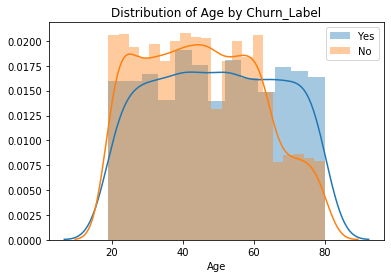

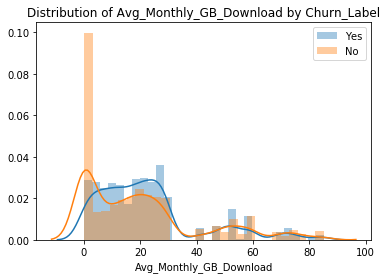

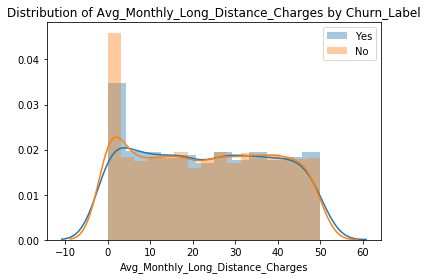

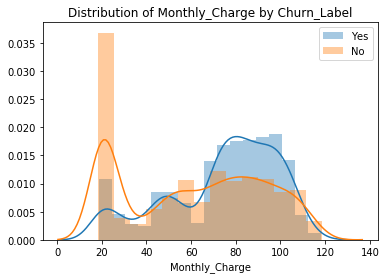

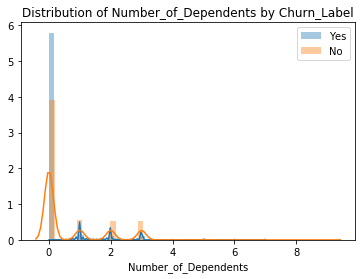

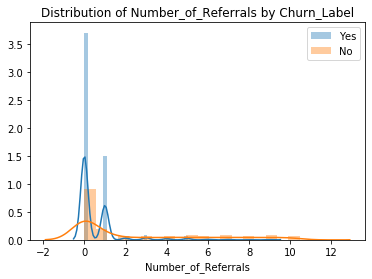

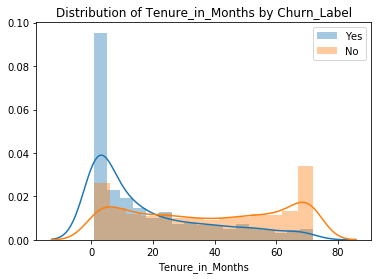

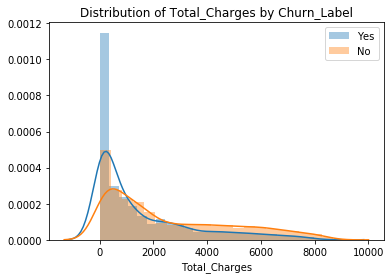

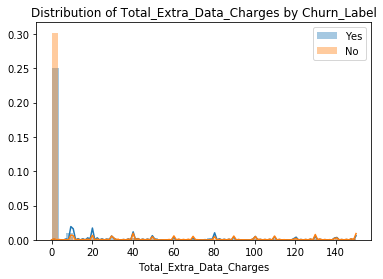

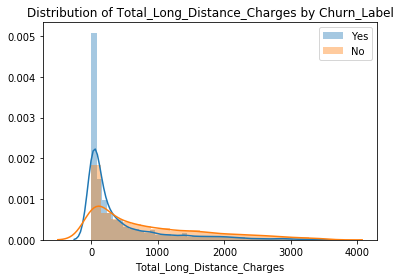

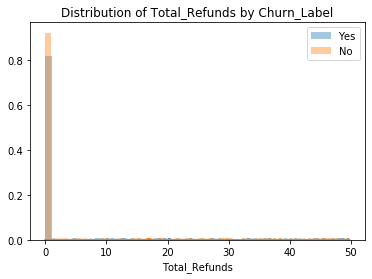

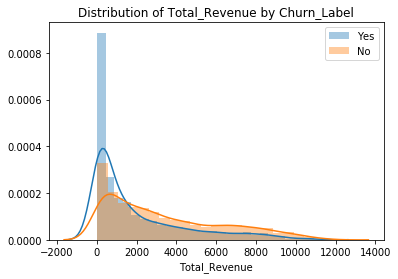

In [42]:
for col in numerical_cols:
      multiple_distplots(joined_df, "Churn_Label", col)
  